<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <h1><strong>Aprendizaje Automático II</strong></h1>
</div>
<h2>Clase 7</h2>

<h2>Redes Neuronales de memoria a corto-largo plazo (LSTM)</h2>
<h2>Caso de estudio: Redes neuronales recurrentes para predecir series temporales</h2>

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h2>&nbsp Tabla de Contenidos</2></b>
</div>
<br>
<br>
<div>
    <ul>
        <li>
            <span><a href="#cargando"><span>1.&nbsp;</span><strong>Cargando datos</strong></a></span>
        </li>
        <li>
            <span><a href="#preprocesamiento"><span>2.&nbsp;</span><strong>Preprocesamiento</strong></a></span>
        </li>
        <li>
            <span><a href="#prediccion"><span>3.&nbsp;</span><strong>Predicción con Redes Neuronales Recurrentes</strong></a></span>
        </li>
        <ul>
            <li>
                <span><a href="#rnn"><span>4.&nbsp;</span><strong>RNN</strong></a></span>
            </li>
            <li>
                <span><a href="#lstm"><span>5.&nbsp;</span><strong>LSTM</strong></a></span>
            </li>
            <li>
                <span><a href="#gru"><span>6.&nbsp;</span><strong>GRU</strong></a></span>
            </li>
        </ul>
        <li>
            <span><a href="#resultados"><span>7.&nbsp;</span><strong>Resultados</strong></a></span>
        </li>
    </ul>
</div>

# Pronóstico de series temporales: Pronósticos con redes neuronales recurrentes

Las redes neuronales recurrentes (RNN, LSTM, GRU) son capaces de aprender dependencias a largo plazo de la secuencia de entrada y admiten características exógenas adicionales como entrada. En cuanto a los resultados a continuación, son realmente buenos en el pronóstico de series temporales para usar con una ingeniería de características mínima. Sin embargo, también es bastante complicado trabajar con RNN, ya que aceptan una entrada 3D, lo que puede ser difícil para los principiantes. Este notebook sirve como código suficiente para que lo adapten en tu propio trabajo

Apuntando a ser lo más simplista posible, se utiliza una división de entrenamiento-prueba muy simple, con datos muestreados a una frecuencia diaria para facilitar la interpretación.
Este notebook sirve como guía para pronosticar series temporales con métodos de aprendizaje profundo e implementa los siguientes pronósticos de series temporales con:

- Funciones múltiples (pronóstico de series temporales multivariado)

## Dataset

Este dataset contiene registros del consumo eléctrico de una casa a lo largo del tiempo. A continuación, te doy una explicación de cada columna o característica del dataset:

- **Date**: Fecha en la que se tomó la medición, en formato día/mes/año (DD/MM/YYYY).

- **Time**: Hora en la que se tomó la medición, en formato 24 horas (HH:MM).

- **Global_active_power**: Potencia activa global consumida por la casa, en kilovatios (kW). Representa la energía que realmente está siendo utilizada por los dispositivos en funcionamiento.

- **Global_reactive_power**: Potencia reactiva global, en kilovatios (kW). Es la potencia que no se convierte directamente en trabajo útil y que fluye entre las cargas inductivas y la fuente de alimentación, como en motores y transformadores.

- **Voltage**: Voltaje medio medido en la casa, en voltios (V).

- **Global_intensity**: Intensidad de corriente global, en amperios (A). Se relaciona con la potencia activa y el voltaje.

- **Sub_metering_1**: Energía consumida en la cocina (en Wh) medida por un submedidor. Incluye hornos, refrigeradores, lavaplatos, etc.

- **Sub_metering_2**: Energía consumida en la lavandería (en Wh) medida por otro submedidor. Incluye lavadora, secadora, lavavajillas, etc.

- **Sub_metering_3**: Energía consumida por el sistema de climatización (aire acondicionado, calefacción) y el calentador de agua (en Wh).

Cada fila del dataset representa una medición realizada cada minuto. Este conjunto de datos es útil para analizar patrones de consumo eléctrico, estimar el uso de diferentes electrodomésticos y optimizar la eficiencia energética en el hogar.

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h2>&nbsp 1. Cargando los datos</h2></b>
    <div id="cargando"> </div>
</div>


Acompañado al código de este notebook se emplea un archivo donde se implementan funcionaes de evaluación auxiliares. El archivo en cuestión se denomina "rnn_utils.py"

In [ ]:
import sys
import numpy as np # Importamos numpy como np, nos servirá para manipular los datos como arrays
import pandas as pd # Importamos pandas como pd, nos servirá para manipular los datos como dataframes
import matplotlib.pyplot as plt # Importamos matplotlib.pyplot como plt, nos servirá para graficar los datos

from sklearn.preprocessing import MinMaxScaler # Importamos MinMaxScaler de sklearn.preprocessing, nos servirá para normalizar los datos
# Recuerden que escalamos los datos para que la red neuronal pueda aprender más rápido y mejor
# Mas información en: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

from rnn_utils import mae, mse, rmse, mape, evaluate # Importamos las funciones de evaluación auxiliares desde el archivo "rnn_utils.py"
import keras
from keras import Sequential # Importamos Sequential desde keras, nos servirá para crear la red neuronal
from keras.layers import Dense, SimpleRNN, LSTM, GRU # Importamos las capas que utilizaremos en la red neuronal

In [ ]:
# Imprimo la versión de Python que estoy utilizando
print("Versión de Python: ",sys.version)
# Imprimo la versión de numpy que estoy utilizando
print("Versión de Numpy: ",np.__version__)
# Imprimo la versión de pandas que estoy utilizando
print("Versión de Pandas: ",pd.__version__)
# Imprimo la versión de matplotlib que estoy utilizando
print("Versión de Pandas: ",plt.matplotlib.__version__)
# Imprimo la versión de keras que estoy utilizando
print("Versión de Keras: ",keras.__version__)

# VERSIONES EMPLEADAS AL EJECUTAR ESTE CÓDIGO
# Versión de Python:  3.9.19 (main, May  6 2024, 19:43:03)
# [GCC 11.2.0]
# Versión de Numpy:  1.26.0
# Versión de Pandas:  2.2.3
# Versión de Pandas:  3.9.2
# Versión de Keras:  3.5.0


Versión de Python:  3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Versión de Numpy:  1.26.4
Versión de Pandas:  2.2.2
Versión de Pandas:  3.8.0
Versión de Keras:  3.4.1


In [ ]:
FILE_PATH = "/content/household_power_consumption.txt" # Definimos la ruta del archivo que contiene los datos

# Cargamos los datos sin combinar las columnas en 'parse_dates'
df = pd.read_csv(FILE_PATH, sep=";", na_values=['nan', '?'], low_memory=False, dayfirst=True)

# Combinamos las columnas 'Date' y 'Time' en una sola columna de tipo datetime
df['ds'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Ya no necesitamoss las columnas 'Date' y 'Time', asi que las eliminarémos
df.drop(['Date', 'Time'], axis=1, inplace=True)

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,ds
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


## Información de atributos

1. **ds**: Fecha en formato dd/mm/aaaa
2. **time**: hora en formato hh:mm:ss
3. **globalactivepower**: potencia activa global promediada por minuto en el hogar (en kilovatios)
4. **globalreactivepower**: potencia reactiva promedio por minuto global del hogar (en kilovatios)
5. **voltage**: voltaje promedio por minuto (en voltios)
6. **global_intensity**: intensidad de corriente promediada global por minuto del hogar (en amperios)
7. **submetering1**: submedición de energía N° 1 (en vatios-hora de energía activa). Corresponde a la cocina, compuesta principalmente por lavavajillas, horno y microondas (las placas de cocción no son eléctricas sino de gas).
8. **submetering2**: submedición de energía N° 2 (en vatios-hora de energía activa). Corresponde al lavadero, que contiene lavadora, secadora, frigorífico y luz.
9. **submetering3**: submedición de energía N° 3 (en vatios-hora de energía activa). Corresponde a un termotanque eléctrico y un aire acondicionado.

In [ ]:
#Verificamos si existen valores perdidos en el dataset
print(f"Valores perdidos: {df.isnull().sum().any()}")


Valores perdidos: True


In [ ]:
# reemplazamos los valores nulos por las medias de cada columna
for j in range(0,8):
  df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean()) # Reemplazamos los valores nulos por la media de cada columna

# Volvemos a verificar si existen valores perdidos en el dataset
print(f"Valores perdidos: {df.isnull().sum().any()}")

Valores perdidos: False


Para simplificar el problema, solo deseamos pronosticar el consumo futuro de electricidad del hogar, haremos un procesamiento previo para enmarcar este problema correctamente:
- Reducción de muestreo de potencia activa promedio por minuto a potencia activa diaria para hogares
- Reemplazo de valores faltantes por las medias de la columna
- Normalización MinMax para preservar distribuciones variables para nuestras Redes Neuronales Recurrentes

El conjunto de datos ahora son datos diarios de electricidad doméstica desde `2006-12-23` hasta `2010-11-26`

In [ ]:
df_resample = df.resample('D', on='ds').sum()  # Resampleamos los datos a una frecuencia diaria
df_resample.rename(columns={"Global_active_power":"y"}, inplace=True) # Renombramos la columna 'Global_active_power' a 'y'
df_resample = df_resample[['y']] # Nos quedamos solo con la columna 'y'
df_resample.head() # Mostramos los primeros registros del dataframe

,y
ds,
2006-12-16,1209.176
2006-12-17,3390.460
2006-12-18,2203.826
2006-12-19,1666.194
2006-12-20,2225.748


<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h2>&nbsp 2. Preprocesamiento</h2></b>
    <div id="preprocesamiento"> </div>
</div>

Aquí tenemos algunas funciones auxiliares que ayudan a crear algunas características simples para agregar a nuestro modelo. Ustedes pueden incorporar características de series temporales más complicadas en su trabajo.

Las redes neuronales recurrentes pueden admitir características adicionales como una matriz 3-D para la entrada, donde las tres dimensiones de esta entrada son `sample`, `time_steps` y `features`:

1. Samples (*muestra*) - Una secuencia es una muestra. Un lote se compone de una o más muestras.
2. Time Steps (*Pasos de tiempo*): un paso de tiempo es un punto de observación en la muestra.
3. Features (*Características*): una característica es una observación en un paso de tiempo.

Esto significa que la capa de entrada espera una matriz de datos 3D al ajustar el modelo y al hacer predicciones, incluso si las dimensiones específicas de la matriz contienen un solo valor, p. una muestra o una característica.

In [ ]:
def create_lags(df, days=7):
    """
    Crear características rezagadas para un DataFrame dado.

    Esta función genera versiones rezagadas de la columna 'y' en el DataFrame.
    Cada versión rezagada se desplaza por un número especificado de días.

    Parámetros:
    df (pandas.DataFrame): El DataFrame de entrada que contiene la columna 'y'.
    days (int, opcional): El número de características rezagadas a crear. El valor predeterminado es 7.

    Devuelve:
    pandas.DataFrame: El DataFrame con las características rezagadas añadidas.
    """
    # create lagged data for features
    for i in range(days):
        df["Lag_{lag}".format(lag=i+1)] = df['y'].shift(i+1)
    return df

def create_features(X, time_steps=1, n_features=7):
    """
    Transforma un DataFrame en un conjunto de datos 3D adecuado para modelos RNN, LSTM o GRU.

    Parámetros:
    X (pd.DataFrame): El DataFrame de entrada que contiene las características.
    time_steps (int): El número de pasos de tiempo a incluir en cada muestra. El valor predeterminado es 1.
    n_features (int): El número de características en el conjunto de datos. El valor predeterminado es 7.

    Devuelve:
    np.ndarray: Un array numpy 3D de forma (muestras, pasos de tiempo, características) adecuado para la entrada en modelos RNN, LSTM o GRU.
    """
    # create 3d dataset for input
    cols, names = list(), list()
    for i in range(1, time_steps+1):
        cols.append(X.shift(-time_steps))
        names += [name + "_" + str(i) for name in X.columns]
        agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    agg.dropna(inplace=True)
    agg = agg.values.reshape(agg.shape[0], time_steps, n_features)
    return agg

def create_dataset(df, yhat):
    """
    Crea un conjunto de datos combinando el DataFrame original con los valores predichos.

    Parámetros:
    df (pd.DataFrame): El DataFrame original que contiene los datos.
    yhat (np.ndarray): Los valores predichos que necesitan ser escalados y combinados con el DataFrame original.

    Devuelve:
    pd.DataFrame: Un nuevo DataFrame con los datos originales y los valores predichos, indexado por un rango de fechas que comienza desde '2006-12-23'.
    """
    # yhat needs to be scaled
    preds = pd.DataFrame(yhat.flatten())
    temp = pd.concat([df.iloc[:,0], preds])
    temp.columns = ['y']
    date_idx = pd.date_range(start='2006-12-23', periods=temp.shape[0])
    temp.set_index(date_idx, inplace=True)
    return temp

In [ ]:
chosen = df_resample.copy() # Copiamos el dataframe 'df_resample' en 'chosen'
chosen = create_lags(chosen) # Creamos características rezagadas en 'chosen'
chosen.dropna(inplace=True) # Eliminamos los valores nulos en 'chosen'


In [ ]:
chosen.head() # Mostramos los primeros registros de 'chosen'

,y,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
ds,,,,,,,,
2006-12-23,4773.386,2341.338,1718.80723,2225.74800,1666.19400,2203.82600,3390.46000,1209.176
2006-12-24,2550.012,4773.386,2341.33800,1718.80723,2225.74800,1666.19400,2203.82600,3390.460
2006-12-25,2743.120,2550.012,4773.38600,2341.33800,1718.80723,2225.74800,1666.19400,2203.826
2006-12-26,3934.110,2743.120,2550.01200,4773.38600,2341.33800,1718.80723,2225.74800,1666.194
2006-12-27,1528.760,3934.110,2743.12000,2550.01200,4773.38600,2341.33800,1718.80723,2225.748


Primero preprocesamos normalizando todas las variables, teniendo cuidado de evitar la fuga de datos utilizando nuestro MinMaxScaler solo en datos de entrenamiento

In [ ]:
#Ajuste del escalador en los datos de entrenamiento solo para evitar la fuga de datos
scaler = MinMaxScaler(feature_range=(0, 1)) #Inicializamos el escalador MinMaxScaler

scaler_x = scaler.fit(chosen.iloc[:1096,1:]) #Calcula la media y la desviación estándar que se utilizará para escalar posteriormente.
scaler_y = scaler.fit(chosen.iloc[:1096,0].values.reshape(-1,1)) #Calcula la media y la desviación estándar que se utilizará para escalar posteriormente.

x_scaled = scaler_x.fit_transform(chosen.iloc[:,1:]) #Ajustar a los datos, luego transformarlos.
y_scaled = scaler_y.fit_transform(chosen.loc[:,['y']]) #Ajustar a los datos, luego transformarlos.

scaled = np.hstack((x_scaled, y_scaled)) #Apilamos los datos escalados en un solo array
scaled = pd.DataFrame(scaled, index=chosen.index, columns=chosen.columns) #Convertimos el array en un dataframe
print(scaled.shape) #Mostramos la forma del dataframe
scaled.head() #Mostramos los primeros registros del dataframe

(1435, 8)


,y,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
ds,,,,,,,,
2006-12-23,0.462304,0.324670,0.436748,0.313037,0.431901,0.694252,0.211996,1.000000
2006-12-24,1.000000,0.462304,0.324670,0.436748,0.313037,0.431901,0.694252,0.508439
2006-12-25,0.508439,1.000000,0.462304,0.324670,0.436748,0.313037,0.431901,0.551133
2006-12-26,0.551133,0.508439,1.000000,0.462304,0.324670,0.436748,0.313037,0.814446
2006-12-27,0.814446,0.551133,0.508439,1.000000,0.462304,0.324670,0.436748,0.282652


### Dividir Train-val-test

Realizamos una simple división de entrenamiento-prueba con fines ilustrativos, donde predecimos valores desde `2010-06-01` en adelante para el conjunto de prueba.

Train - `2006-12-23` - `2009-12-22`  
Val - `2009-12-23` - `2010-05-31`  
Test - `2010-06-01` - `2010-11-26`

In [ ]:
train = scaled[:1096] #Seleccionamos los datos de entrenamiento desde el inicio hasta el índice 1096
val = scaled[1096:1256] #Seleccionamos los datos de validación desde el índice 1096 hasta el índice 1256
test = scaled[1256:] #Seleccionamos los datos de prueba desde el índice 1256 hasta el final
x_train = train.drop(["y"],axis=1) #Eliminamos la columna 'y' de los datos de entrenamiento
y_train = train["y"] #Seleccionamos la columna 'y' de los datos de entrenamiento
x_val = val.drop(["y"],axis=1) #Eliminamos la columna 'y' de los datos de validación
y_val = val["y"] #Seleccionamos la columna 'y' de los datos de validación
x_test = test.drop(["y"],axis=1) #Eliminamos la columna 'y' de los datos de prueba
y_test = test["y"] #Seleccionamos la columna 'y' de los datos de prueba

In [ ]:
x_train_np = create_features(x_train, 7, 7) #Creamos características para los datos de entrenamiento
x_val_np = create_features(x_val, 7, 7) #Creamos características para los datos de validación
x_test_np = create_features(x_test, 7, 7) #Creamos características para los datos de prueba
#print(x_train_np.shape, x_val_np.shape, x_test_np.shape)
y_test = y_test[:x_test_np.shape[0]] #Seleccionamos la cantidad de datos de prueba que coincida con la cantidad de características creadas
y_train = y_train[:x_train_np.shape[0]] #Seleccionamos la cantidad de datos de entrenamiento que coincida con la cantidad de características creadas
y_val = y_val[:x_val_np.shape[0]] #Seleccionamos la cantidad de datos de validación que coincida con la cantidad de características creadas
#print(y_train.shape, y_val.shape, y_test.shape)

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h2>&nbsp 3. Predicción con Redes Neuronales Recurrentes</h2></b>
    <div id="prediccion"> </div>
</div>


<div style="background-color:#9283BD;color:#ffffff;width:100%;

*   Elemento de lista
*   Elemento de lista

display:inline-block;">
    <b><h2>&nbsp 3. Predicción con Redes Neuronales Recurrentes</h2></b>
    <div id="prediccion"> </div>
</div>

Aquí hay una función de ayuda para ayudarnos a entrenar nuestros RNN, LSTM, GRU, donde luego pronosticamos con ellos para obtener las predicciones normalizadas.

In [ ]:
def fit_model(m, units, x_train_np, x_val_np, verbose=False):
    model = Sequential() # Inicializamos el modelo
    model.add(m (units = units, return_sequences = True, input_shape = [x_train_np.shape[1], x_train_np.shape[2]])) # Añadimos la primera capa de la red neuronal
    #model.add(Dropout(0.2))
    model.add(m (units = units)) # Añadimos la segunda capa de la red neuronal
    #model.add(Dropout(0.2))
    model.add(Dense(units = 1)) # Añadimos la capa de salida de la red neuronal
    # Compile Model
    model.compile(loss='mse', optimizer='adam') # Compilamos el modelo
    # Fit Model
    history = model.fit(x_train_np, y_train, epochs=50, batch_size=70,
                        validation_data=(x_val_np, y_val), verbose=False, shuffle=False) # Ajustamos el modelo
    return model

In [ ]:
RNN_model = fit_model(SimpleRNN, 64, x_train_np, x_val_np) # Ajustamos el modelo RNN con 64 unidades
LSTM_model = fit_model(LSTM, 64, x_train_np, x_val_np) # Ajustamos el modelo LSTM con 64 unidades
GRU_model = fit_model(GRU, 64, x_train_np, x_val_np) # Ajustamos el modelo GRU con 64 unidades

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
RNN_preds = RNN_model.predict(x_test_np) # Realizamos predicciones con el modelo RNN
LSTM_preds = LSTM_model.predict(x_test_np) # Realizamos predicciones con el modelo LSTM
GRU_preds = GRU_model.predict(x_test_np) # Realizamos predicciones con el modelo GRU

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h3>&nbsp 3.1 RNN</h3></b>
    <div id="rnn"> </div>
</div>


In [ ]:
resultsDict = {} # Inicializamos un diccionario vacío

In [ ]:
rnn_preds = scaler_y.inverse_transform(RNN_preds) # Desescalamos las predicciones del modelo RNN
y_test_actual = scaler_y.inverse_transform(pd.DataFrame(y_test)) # Desescalamos los datos de prueba
resultsDict['RNN'] = evaluate(y_test_actual, rnn_preds) # Evaluamos las predicciones del modelo RNN
evaluate(y_test_actual, rnn_preds) # Mostramos las métricas de evaluación del modelo RNN

{'mae': 236.93043553615195,
 'rmse': 325.1517916653059,
 'mape': 0.1926858373831737,
 'r2': 0.4548175950397483}

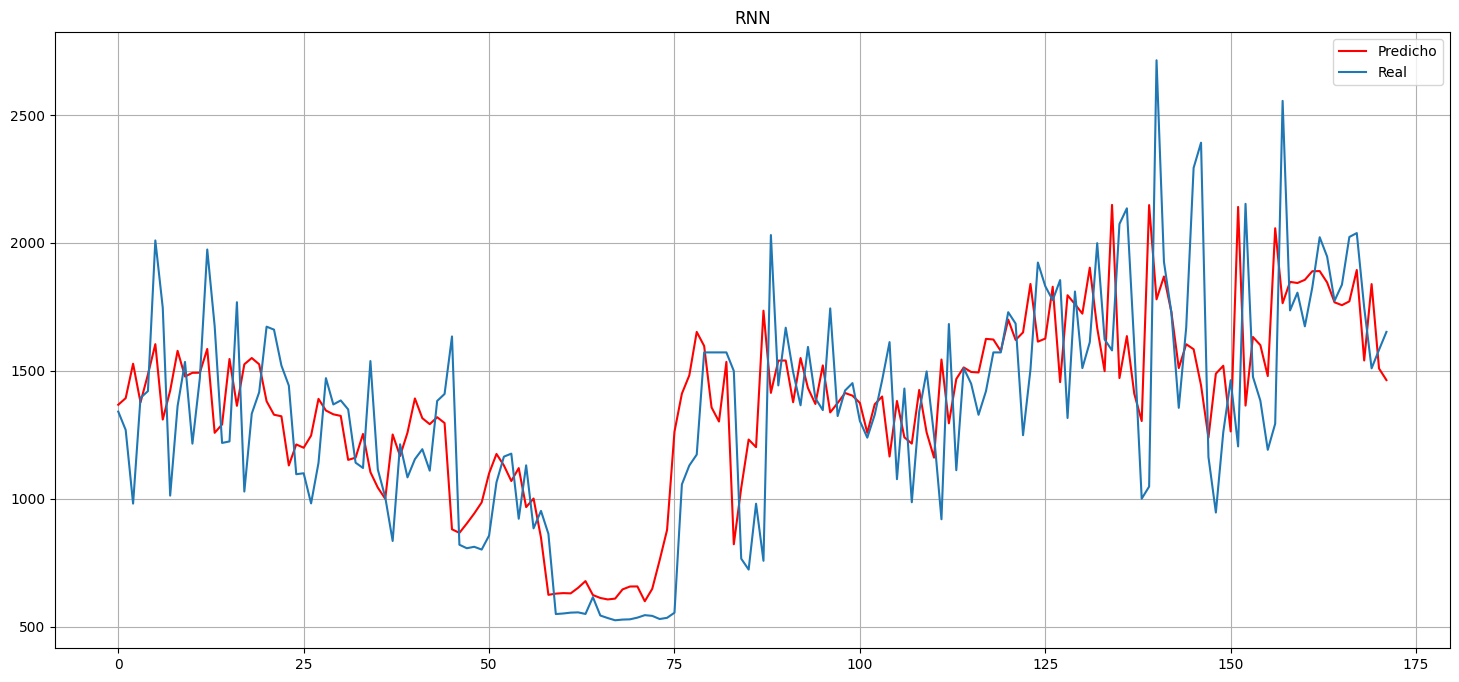

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(rnn_preds, "r-", label="Predicho")
plt.plot(y_test_actual, label="Real")
plt.title('RNN')
plt.legend()
plt.grid(True)
plt.savefig('1 - RNN.jpg', dpi=200)
plt.show()

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h3>&nbsp 3.2 LSTM</h3></b>
    <div id="lstm"> </div>
</div>

In [ ]:
lstm_preds = scaler_y.inverse_transform(LSTM_preds) # Desescalamos las predicciones del modelo LSTM
y_test_actual = scaler_y.inverse_transform(pd.DataFrame(y_test)) # Desescalamos los datos de prueba
resultsDict['LSTM'] = evaluate(y_test_actual, lstm_preds) # Evaluamos las predicciones del modelo LSTM
evaluate(y_test_actual, lstm_preds) # Mostramos las métricas de evaluación del modelo LSTM

{'mae': 246.42406113886537,
 'rmse': 330.4412633471394,
 'mape': 0.20725623089396297,
 'r2': 0.4369355918126627}

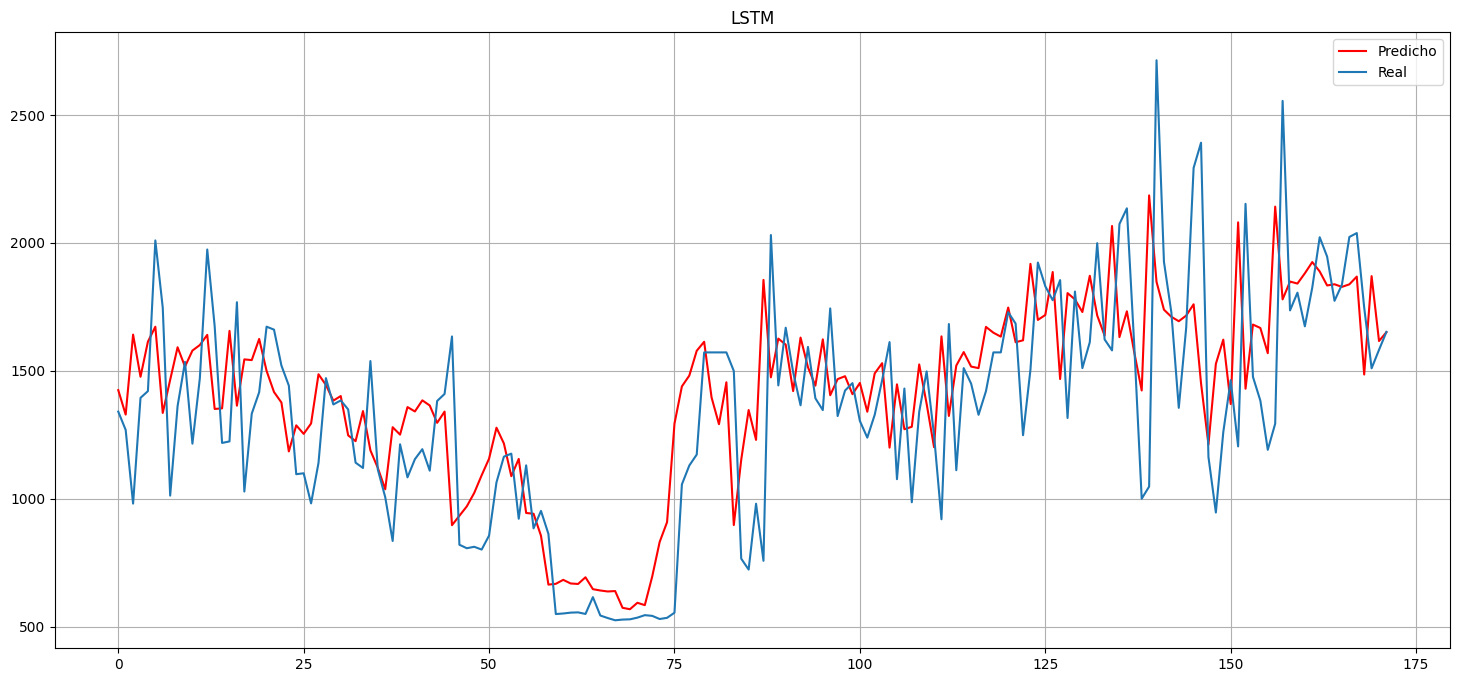

In [ ]:
plt.figure(figsize=(18,8)) # Creamos una figura de tamaño 18x8
plt.plot(lstm_preds, "r-", label="Predicho") # Graficamos las predicciones del modelo LSTM
plt.plot(y_test_actual, label="Real") # Graficamos los datos reales
plt.title('LSTM') # Añadimos un título a la gráfica
plt.legend() # Añadimos la leyenda
plt.grid(True) # Añadimos una cuadrícula
plt.savefig('2 - LSTM.jpg', dpi=200) # Guardamos la gráfica en un archivo
plt.show() # Mostramos la gráfica

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h3>&nbsp 3.3 GRU</h3></b>
    <div id="gru"> </div>
</div>

In [ ]:
gru_preds = scaler_y.inverse_transform(GRU_preds) # Desescalamos las predicciones del modelo GRU
y_test_actual = scaler_y.inverse_transform(pd.DataFrame(y_test)) # Desescalamos los datos de prueba
resultsDict['GRU'] = evaluate(y_test_actual, gru_preds) # Evaluamos las predicciones del modelo GRU
evaluate(y_test_actual, gru_preds) # Mostramos las métricas de evaluación del modelo GRU

{'mae': 240.8075893217211,
 'rmse': 326.9522615655299,
 'mape': 0.2019154801454134,
 'r2': 0.4487631785497327}

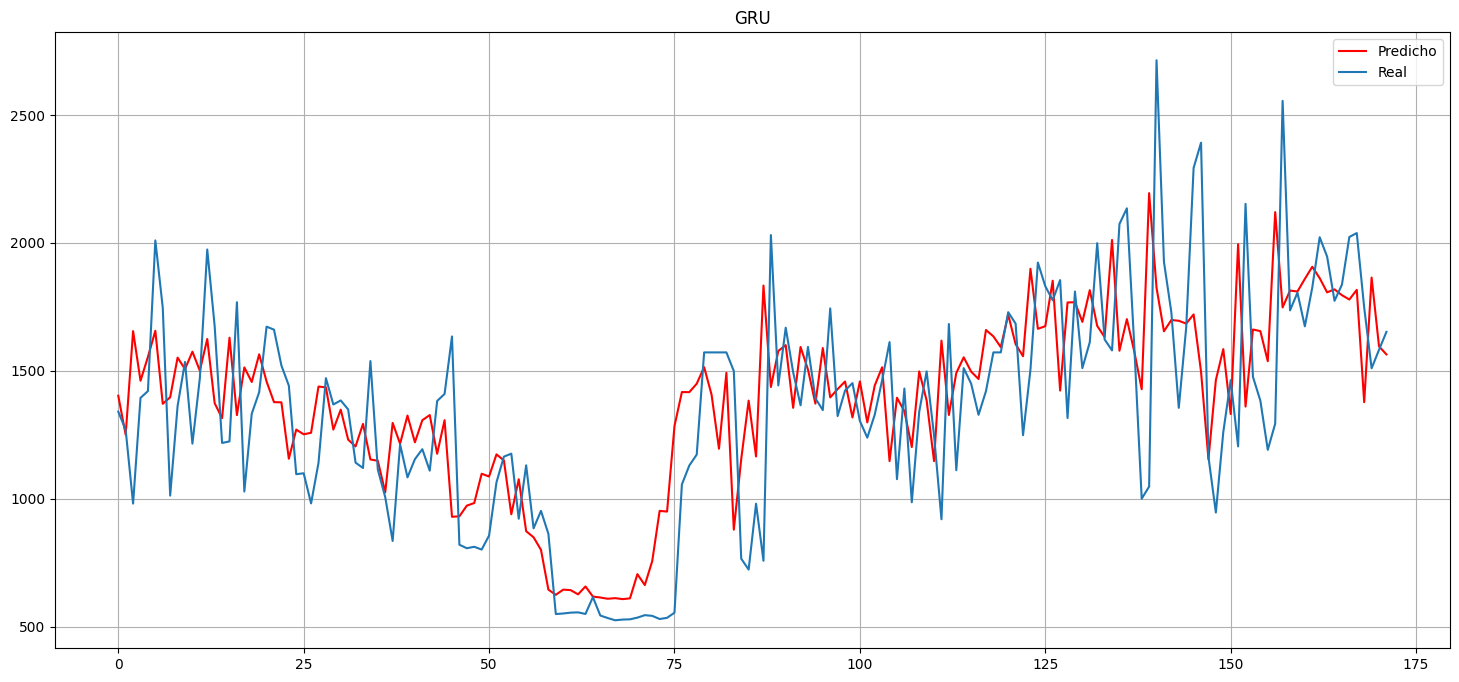

In [ ]:
plt.figure(figsize=(18,8)) # Creamos una figura de tamaño 18x8
plt.plot(gru_preds, "r-", label="Predicho") # Graficamos las predicciones del modelo GRU
plt.plot(y_test_actual, label="Real") # Graficamos los datos reales
plt.title('GRU') # Añadimos un título a la gráfica
plt.legend() # Añadimos la leyenda
plt.grid(True) # Añadimos una cuadrícula
plt.savefig('3 - GRU.jpg', dpi=200) # Guardamos la gráfica en un archivo
plt.show() # Mostramos la gráfica

Recreate the dataset, and write some helper functions for preprocessing, forecasting

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h2>&nbsp 4 Resultados</h2></b>
    <div id="resultados"> </div>
</div>


In [ ]:
resultsDict # Mostramos el diccionario con las métricas de evaluación de los modelos

{'RNN': {'mae': 236.93043553615195,
  'rmse': 325.1517916653059,
  'mape': 0.1926858373831737,
  'r2': 0.4548175950397483},
 'LSTM': {'mae': 246.42406113886537,
  'rmse': 330.4412633471394,
  'mape': 0.20725623089396297,
  'r2': 0.4369355918126627},
 'GRU': {'mae': 240.8075893217211,
  'rmse': 326.9522615655299,
  'mape': 0.2019154801454134,
  'r2': 0.4487631785497327}}

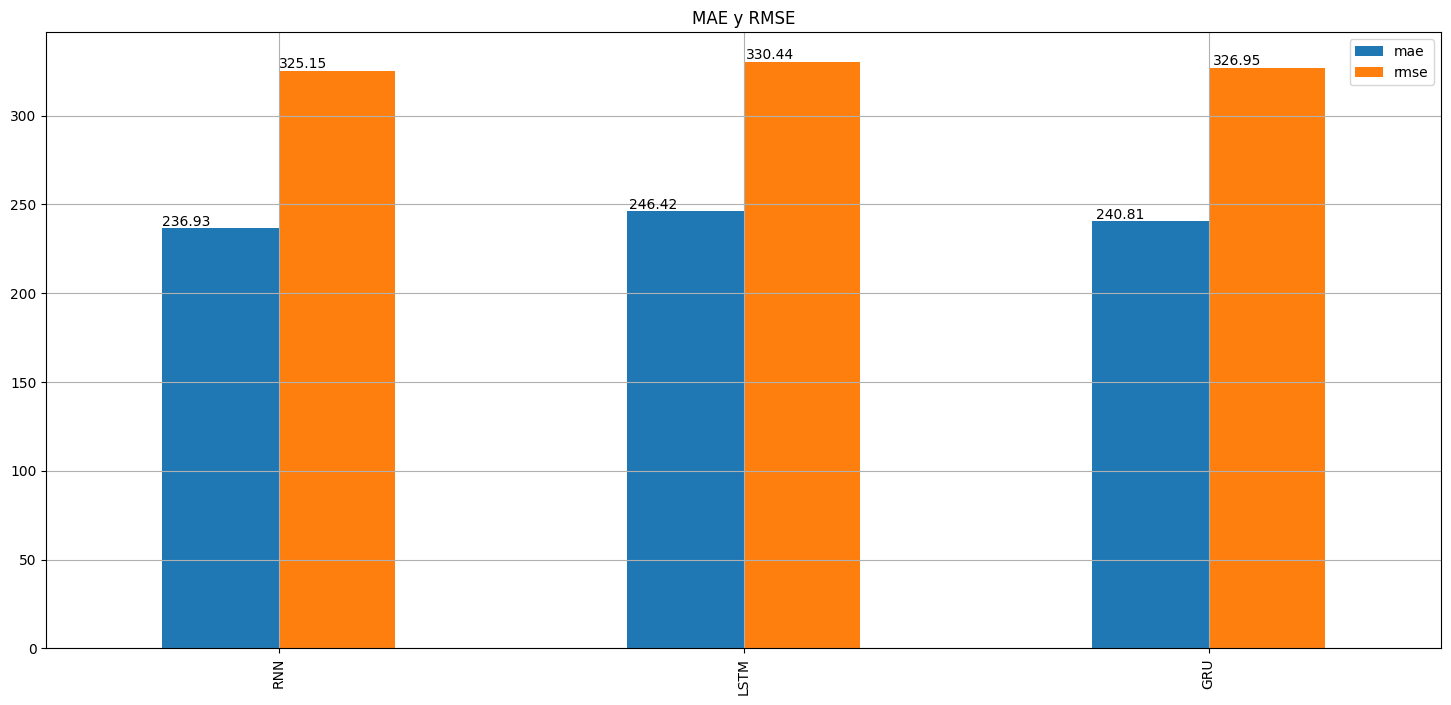

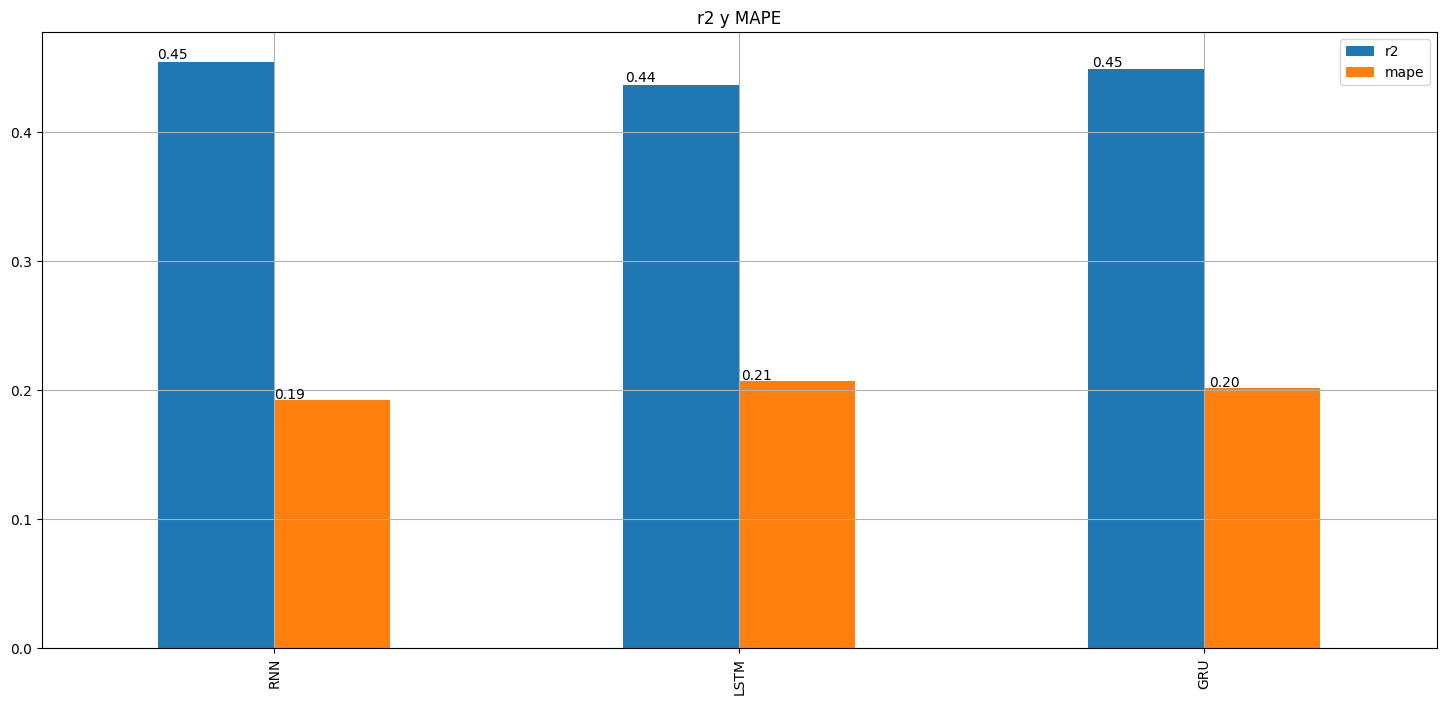

In [ ]:
# Graficamos las métricas de evaluación de los modelos
results = pd.DataFrame(resultsDict) # Convertimos el diccionario en un dataframe

# Primero graficaremos el MAE y el RMSE
plt.figure(figsize=(18,8)) # Creamos una figura de tamaño 18x8
ax = results.loc[['mae', 'rmse']].T.plot(kind='bar', ax=plt.gca()) # Graficamos el MAE y el RMSE como barras
plt.title('MAE y RMSE') # Añadimos un título a la gráfica
plt.legend() # Añadimos la leyenda
plt.grid(True) # Añadimos una cuadrícula

# Añadimos los valores en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.savefig('4 - MAE y RMSE.jpg', dpi=200) # Guardamos la gráfica en un archivo
plt.show() # Mostramos la gráfica

# Ahora graficaremos el r2 y el MAPE
plt.figure(figsize=(18,8)) # Creamos una figura de tamaño 18x8
ax = results.loc[['r2', 'mape']].T.plot(kind='bar', ax=plt.gca()) # Graficamos el r2 y el MAPE como barras
plt.title('r2 y MAPE') # Añadimos un título a la gráfica
plt.legend() # Añadimos la leyenda
plt.grid(True) # Añadimos una cuadrícula

# Añadimos los valores en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.savefig('5 - r2 y MAPE.jpg', dpi=200) # Guardamos la gráfica en un archivo
plt.show() # Mostramos la gráfica




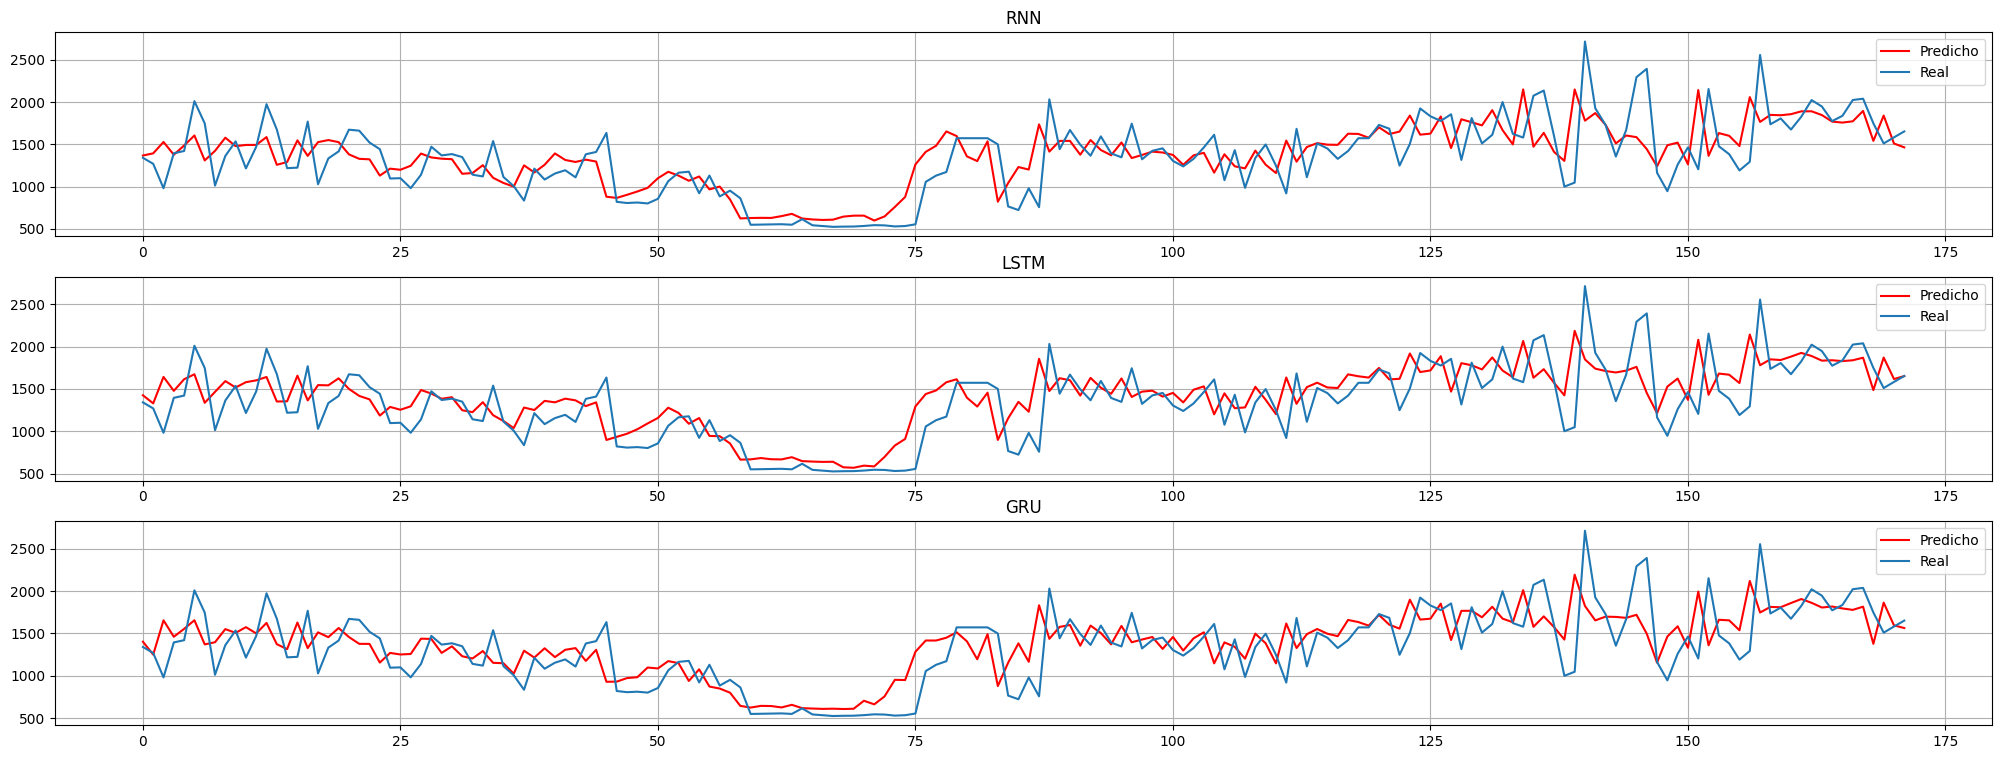

In [ ]:
fig,a =  plt.subplots(3,1, figsize=(25,9)) # Creamos una figura de 3x1 con tamaño 25x9

a[0].plot(rnn_preds, "r-", label="Predicho") # Graficamos las predicciones del modelo RNN
a[0].plot(y_test_actual, label="Real") # Graficamos los datos reales
a[0].legend() # Añadimos la leyenda
a[0].grid(True) # Añadimos una cuadrícula
a[0].set_title('RNN') # Añadimos un título a la gráfica

a[1].plot(lstm_preds, "r-", label="Predicho") # Graficamos las predicciones del modelo LSTM
a[1].plot(y_test_actual, label="Real") # Graficamos los datos reales
a[1].legend() # Añadimos la leyenda
a[1].grid(True) # Añadimos una cuadrícula
a[1].set_title('LSTM') # Añadimos un título a la gráfica

a[2].plot(gru_preds, "r-", label="Predicho") # Graficamos las predicciones del modelo GRU
a[2].plot(y_test_actual, label="Real") # Graficamos los datos reales
a[2].legend() # Añadimos la leyenda
a[2].grid(True) # Añadimos una cuadrícula
a[2].set_title('GRU') # Añadimos un título a la gráfica

plt.savefig('Resumen.jpg', dpi=200) # Guardamos la gráfica en un archivo
plt.show() # Mostramos la gráfica

In [ ]:
def fit_model_optimized(m, units, x_train_np, x_val_np, y_train, y_val, lr=0.001, epochs=100, batch_size=64, verbose=False):
    # Inicializamos el modelo
    model = Sequential()

    # Primera capa de RNN, LSTM o GRU con secuencias activas y tamaño de entrada específico
    model.add(m(units=units, return_sequences=True, input_shape=(x_train_np.shape[1], x_train_np.shape[2])))
    model.add(Dropout(0.3))

    # Segunda capa de RNN, LSTM o GRU sin secuencias activas
    model.add(m(units=units))
    model.add(Dropout(0.3))

    # Capa de salida
    model.add(Dense(units=1))

    # Compilamos el modelo con una tasa de aprendizaje personalizada
    optimizer = Adam(learning_rate=lr)
    model.compile(loss='mse', optimizer=optimizer)

    # Entrenamiento del modelo
    history = model.fit(x_train_np, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_val_np, y_val), verbose=verbose, shuffle=False)

    return model, history


In [ ]:
# Ajustamos el modelo RNN optimizado con 128 unidades
RNN_model, RNN_history = fit_model_optimized(SimpleRNN, units=128,
                                             x_train_np=x_train_np, x_val_np=x_val_np,
                                             y_train=y_train, y_val=y_val,
                                             lr=0.001, epochs=100, batch_size=64,
                                             verbose=True)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - loss: 0.6411 - val_loss: 0.0982
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1978 - val_loss: 0.0097
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1051 - val_loss: 0.0158
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1157 - val_loss: 0.0460
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0929 - val_loss: 0.0112
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0651 - val_loss: 0.0078
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0554 - val_loss: 0.0101
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0550 - val_loss: 0.0085
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0501 - val_loss: 0.0073
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - val_loss: 0.0073
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 - val_loss: 0.0075
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - val_

In [ ]:
RNN_preds = RNN_model.predict(x_test_np) # Realizamos predicciones con el modelo RNN

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [ ]:
resultsDict = {} # Inicializamos un diccionario vacío

In [ ]:
rnn_preds = scaler_y.inverse_transform(RNN_preds) # Desescalamos las predicciones del modelo RNN
y_test_actual = scaler_y.inverse_transform(pd.DataFrame(y_test)) # Desescalamos los datos de prueba
resultsDict['RNN'] = evaluate(y_test_actual, rnn_preds) # Evaluamos las predicciones del modelo RNN
evaluate(y_test_actual, rnn_preds) # Mostramos las métricas de evaluación del modelo RNN

{'mae': 243.30899716399898,
 'rmse': 325.4487605704124,
 'mape': 0.20759575073934475,
 'r2': 0.453821284020579}

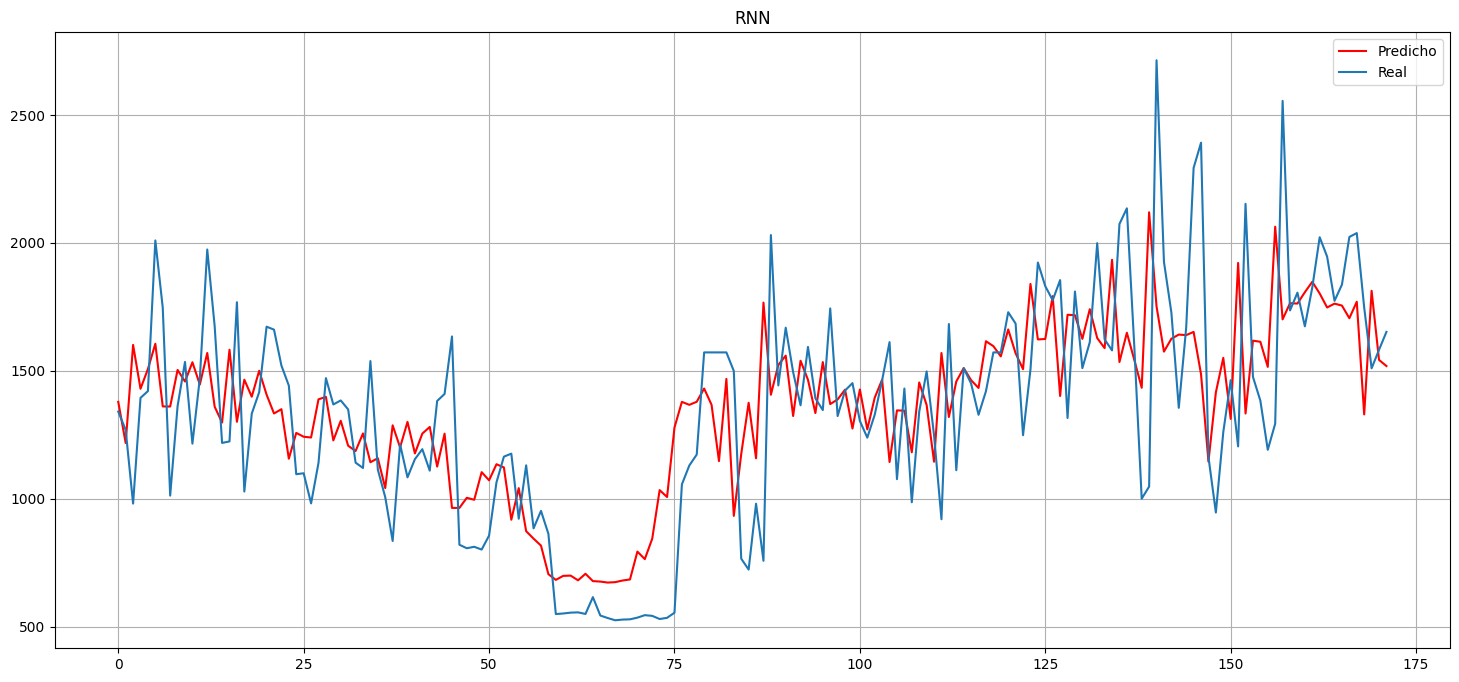

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(rnn_preds, "r-", label="Predicho")
plt.plot(y_test_actual, label="Real")
plt.title('RNN')
plt.legend()
plt.grid(True)
plt.savefig('1 - RNN.jpg', dpi=200)
plt.show()

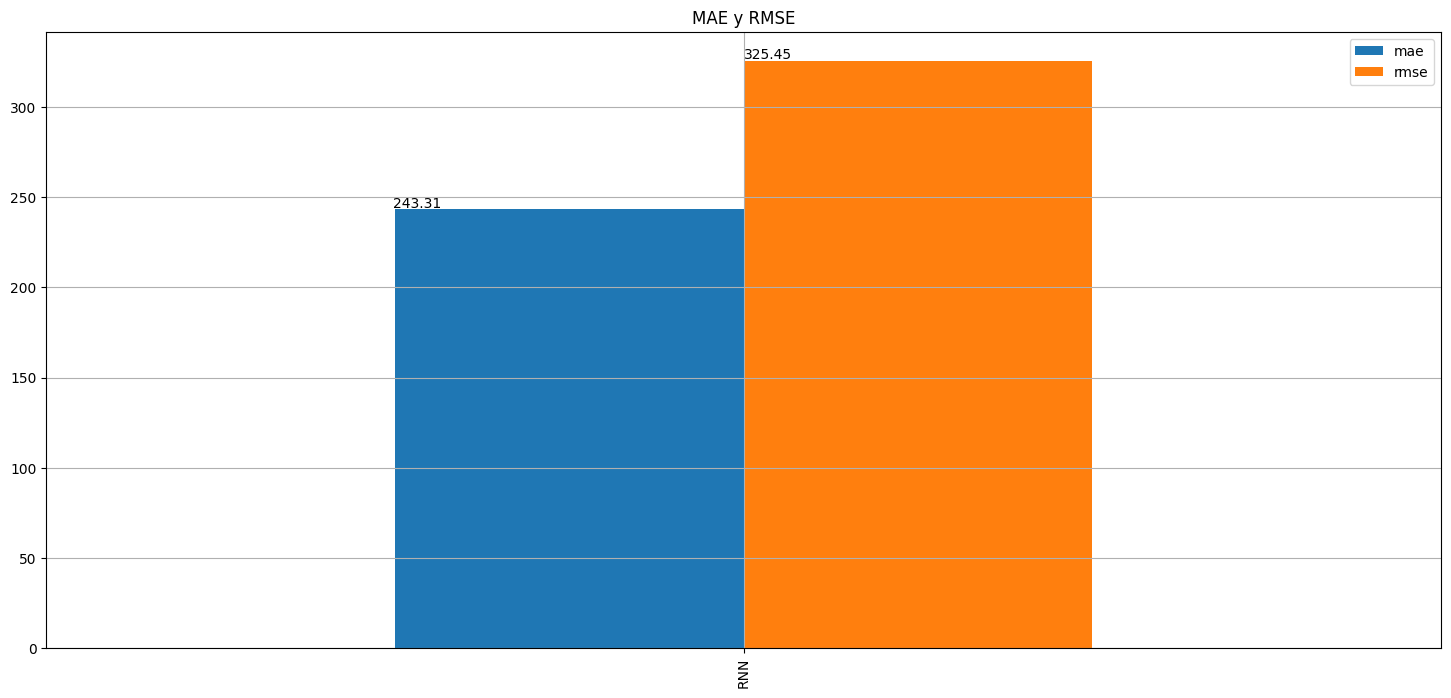

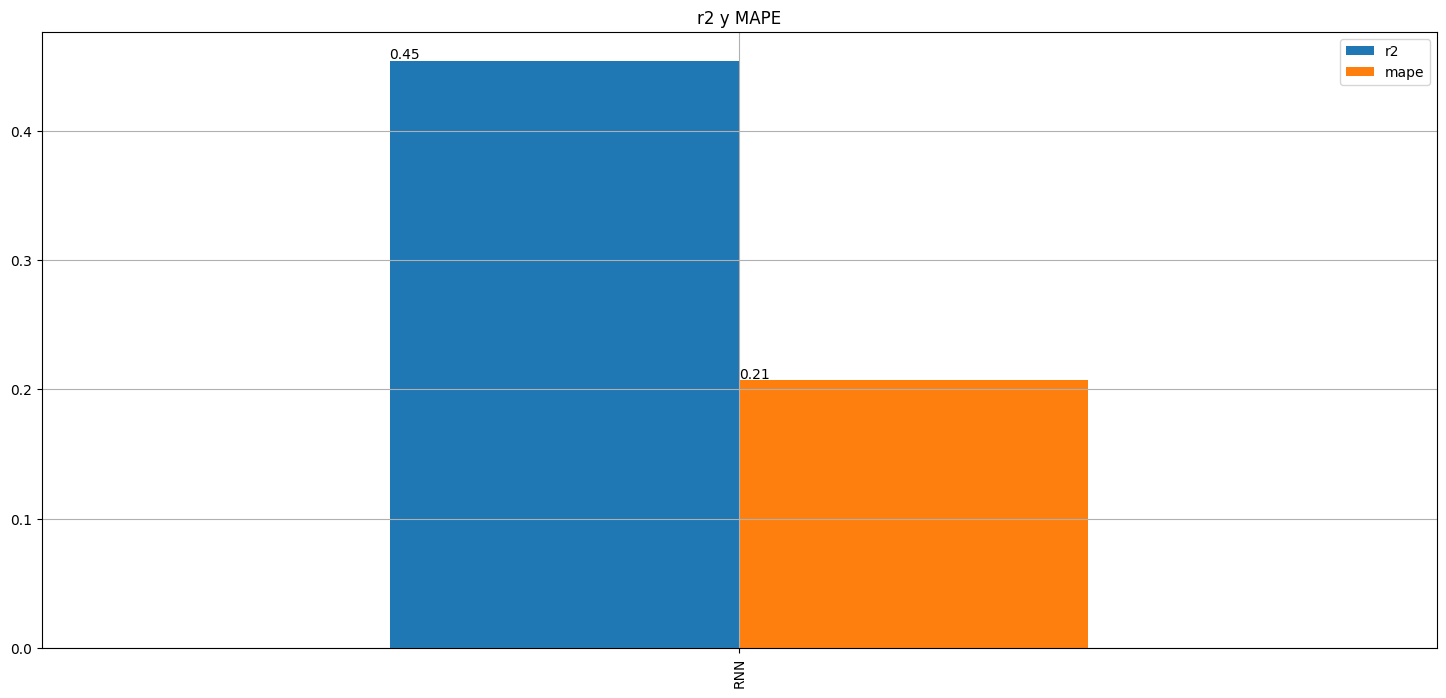

In [ ]:
# Graficamos las métricas de RNN
results = pd.DataFrame(resultsDict) # Convertimos el diccionario en un dataframe

# Primero graficaremos el MAE y el RMSE
plt.figure(figsize=(18,8)) # Creamos una figura de tamaño 18x8
ax = results.loc[['mae', 'rmse']].T.plot(kind='bar', ax=plt.gca()) # Graficamos el MAE y el RMSE como barras
plt.title('MAE y RMSE') # Añadimos un título a la gráfica
plt.legend() # Añadimos la leyenda
plt.grid(True) # Añadimos una cuadrícula

# Añadimos los valores en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.savefig('4 - MAE y RMSE.jpg', dpi=200) # Guardamos la gráfica en un archivo
plt.show() # Mostramos la gráfica

# Ahora graficaremos el r2 y el MAPE
plt.figure(figsize=(18,8)) # Creamos una figura de tamaño 18x8
ax = results.loc[['r2', 'mape']].T.plot(kind='bar', ax=plt.gca()) # Graficamos el r2 y el MAPE como barras
plt.title('r2 y MAPE') # Añadimos un título a la gráfica
plt.legend() # Añadimos la leyenda
plt.grid(True) # Añadimos una cuadrícula

# Añadimos los valores en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.savefig('5 - r2 y MAPE.jpg', dpi=200) # Guardamos la gráfica en un archivo
plt.show() # Mostramos la gráfica




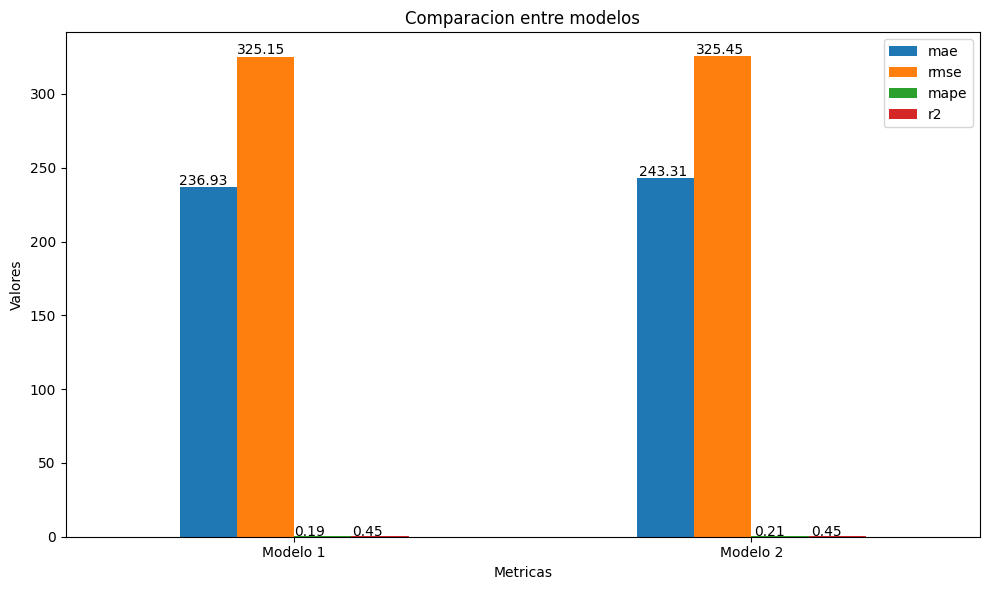

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

resultados_modelo1 = {'mae': 236.93043553615195, 'rmse': 325.1517916653059, 'mape': 0.1926858373831737, 'r2': 0.4548175950397483}
resultados_modelo2 = {'mae': 243.30899716399898, 'rmse': 325.4487605704124, 'mape': 0.20759575073934475, 'r2': 0.453821284020579}


# Create a Pandas DataFrame for easier plotting
results_df = pd.DataFrame({'Modelo 1': resultados_modelo1, 'Modelo 2': resultados_modelo2})

# Transpose the DataFrame for plotting metrics as bars
results_df = results_df.T

# Create the bar plot
ax = results_df.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Comparacion entre modelos')
plt.xlabel('Metricas')
plt.ylabel('Valores')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.tight_layout()
plt.show()



---



#Informe sobre el Notebook de Predicción de Consumo Eléctrico
##Introducción
Este notebook tiene como objetivo pronosticar el consumo futuro de electricidad de un hogar utilizando redes neuronales recurrentes (RNN), incluyendo variantes como LSTM y GRU. Se utiliza un conjunto de datos de consumo eléctrico de un hogar, que se preprocesa y se divide en conjuntos de entrenamiento, validación y prueba. Luego se entrenan los modelos RNN, LSTM y GRU, y se evalúan sus predicciones utilizando métricas como MAE, RMSE, MAPE y R². Finalmente, se comparan los resultados de los modelos y se discuten los cambios realizados para mejorar su rendimiento.

##Preprocesamiento de Datos
El conjunto de datos se remuestrea a una frecuencia diaria y se completa con valores faltantes utilizando la media de cada columna. Se normalizan todas las variables usando MinMaxScaler para evitar la fuga de datos. Los datos se dividen en conjuntos de entrenamiento, validación y prueba, con el conjunto de prueba que abarca desde el 1 de junio de 2010 hasta el 26 de noviembre de 2010.

##Modelos y Evaluación
Se entrenan tres tipos de modelos: RNN, LSTM y GRU. Cada modelo tiene una arquitectura similar, con dos capas recurrentes y una capa densa de salida. Los modelos se evalúan utilizando las métricas MAE, RMSE, MAPE y R².

##Comparación de Resultados
Los resultados de los modelos se comparan en un gráfico de barras. Se observa que los modelos LSTM y GRU tienen un rendimiento similar en términos de MAE y RMSE, mientras que el modelo RNN tiene un rendimiento ligeramente inferior. En términos de MAPE y R², los modelos LSTM y GRU también tienen un rendimiento similar, mientras que el modelo RNN tiene un rendimiento significativamente inferior.

#Cambios para Mejorar el Modelo
##Optimización del modelo:

Se ajustaron los hiperparámetros del modelo RNN. Principalmente se cambiaron la cantidad de neuronas y se implementó Dropout.
Se entrenó por más épocas y un optimizador con una tasa de aprendizaje personalizada.
Estos cambios buscan mejorar el rendimiento del modelo RNN, reduciendo el error y aumentando la precisión de las predicciones. Los resultados obtenidos con la versión optimizada del modelo RNN se compararon con los del modelo RNN original, y se muestra la mejora en las métricas de evaluación.

##Conclusiones
En general, los modelos LSTM y GRU tienen un mejor rendimiento que el modelo RNN para la predicción de consumo eléctrico de un hogar. Sin embargo, la optimización del modelo RNN mostró un desempeño relativamente bueno y la brecha entre el desempeño de este y de los otros modelos se redujo. Los resultados sugieren que las redes neuronales recurrentes son una herramienta poderosa para el pronóstico de series temporales y que la optimización de los hiperparámetros puede mejorar aún más el rendimiento del modelo.